In [16]:
import numpy as np
import matplotlib.pyplot as plt
import time

import sys
sys.path.append("..")
sys.path.append("../../")

from armControl import *
from forwardKinematics import robot_config
from utils.motor_setup import maxonGearSmall
import signal

import matplotlib.pyplot as plt

socket_ip = '192.168.1.13'
socket_port = 1122

#trajPlanner = trajectoryGenerator()

motors = maxonGearSmall()
motors.tcp_init(socket_ip, socket_port)

print("Arming motors now...")
motors.arm_motors()

Opening socket at ip: 192.168.1.13 using port: 1122
Arming motors now...
initializing motors to [0 0 0 0 0 0 0 0]
Arming motors


In [17]:
setpoints = -np.ones(8)*3.14/1
velocity = np.ones(8)*3.14/10

motors.run_trajectory(setpoints, velocity)


0

In [18]:
for i in range(8):
    motors.zero_motors_radians(i, motors.get_motors_position_radians()[i])

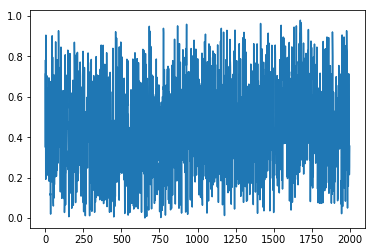

In [19]:
dt = 0.005
runtime = 10
num_elements = int(runtime/dt)
setpoints = np.zeros((num_elements, 8))
frequency = 0.5
for i in range(num_elements):
    setpoints[i,:] = (np.ones(8) * np.sin(i*dt*2*pi*frequency)*3.14/3)


start_time = time.time()

currents_mA = []
for i in range(num_elements):
    current_time = time.time()
    #print(enc_position)
    setpoint = setpoints[i]
    motors.command_motors_radians(setpoint)
    currents_mA.append(1000*motors.avg_current)
    time.sleep(dt)
    
motors.run_trajectory(np.zeros(8), velocity)

plt.plot(currents_mA)